In [268]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imp, os, pickle, time, tables
import scipy.sparse as sp_sparse
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import scipy.stats

from matplotlib import rcParams

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 10,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
   'text.usetex': False,
   }
rcParams.update(params)

sns.set(font_scale = 2)
sns.set(style="whitegrid")


In [331]:
rand_folder = '../experiments/NIPS2019sim/netflix100k/rand//'
num_files = len(os.listdir(rand_folder))
print(num_files)

num_pullsArr = 0
accuracyArr = 0


# best_arm = 103077 #rnaseq100k
# best_arm = 7374 #rnaseq20k
best_arm = 11370 #netflix20k
# best_arm = 11370 #netflix100k
# best_arm = 3368 #mnist



time_arr = []
row_iter = 0
for flname in os.listdir(rand_folder):
    with open(rand_folder+flname,'rb') as f:
        
        x=pickle.load(f, encoding='latin1')
        correct = np.equal(x[0],best_arm)*1.0

        if accuracyArr is 0:
            accuracyArr = np.ones((num_files,len(x[0])))
        
        accuracyArr[row_iter] = correct
        num_pullsArr = x[1]
        time_arr.append(x[2][-1])
        row_iter +=1

randPulls = num_pullsArr
randError = 1-accuracyArr.mean(axis=0)
print(np.mean(time_arr))

1000
959.1896900498867


In [332]:
meddit_folder = '../experiments/NIPS2019sim/netflix100k/meddit_1init////'
num_files = len(os.listdir(meddit_folder))
print(num_files)
totalPullsNeededArr = []
pullsNeededRef = []
m=5000
accuracyArr = np.ones((num_files,m))
time_arr = []

# best_arm = 103077 #rnaseq100k
# best_arm = 7374 #rnaseq20k
# best_arm = 11370 #netflix20k
# best_arm = 3368 #mnist
# best_arm = 11370 #netflix100k



row_iter = 0
for flname in os.listdir(meddit_folder):
    with open(meddit_folder+flname,'rb') as f:

        x=pickle.load(f, encoding='latin1')
        pulls = x[1]
        if len(pulls) > len(pullsNeededRef):
            pullsNeededRef = pulls
        totalPullsNeededArr.append(pulls[-1])

        correct = np.equal(x[0],best_arm)*1.0
        accuracyArr[row_iter,:len(correct)] = correct
        accuracyArr[row_iter,len(correct):] = correct[-1]

        time_arr.append(x[2])
        row_iter +=1

medditPulls = pullsNeededRef
medditError = 1-accuracyArr.mean(axis=0)[:len(pullsNeededRef)]
print(np.average(totalPullsNeededArr), np.mean(time_arr), np.median(time_arr))

1000


In [333]:
mab_folder = '../experiments/NIPS2019sim/netflix100k/correlated_SH/'
print(len(os.listdir(mab_folder)))

# best_arm = 103077 #rnaseq100k
# best_arm = 7374 #rnaseq20k
# best_arm = 11370 #netflix20k
# best_arm = 11370 #netflix100k
# best_arm = 9658 #rand_gaussian
# best_arm = 3368 #mnist
# best_arm = 17094 #rand_gaussian2

ctr = 0
arrs = {}
for flname in os.listdir(mab_folder):
    
    with open(mab_folder+flname,'rb') as f:
        x=pickle.load(f, encoding='latin1')
        x[0] = np.equal(x[0],best_arm)*1.0
        num_pulls = float(flname.split("_")[0])
        ctr +=1
        if num_pulls in arrs:
            arrs[num_pulls] = np.vstack((arrs[num_pulls], x))
        else:
            arrs[num_pulls] = np.array(x)


arrs_avg = {}
corrSH_accuracy = []
timing = []
std_dev = []
largeScale_num_pulls_fake = np.sort(list(arrs.keys()))
corrSH_num_pulls = []
corrSH_time = []
# for key,value in arrs.iteritems():
for key in largeScale_num_pulls_fake:
    value = arrs[key]
    val = value.mean(axis = 0)
#     print(key, len(value), val)
    print("Using {:.3F} pulls -> {:.3F} accuracy".format(val[1],val[0]))

    corrSH_accuracy.append(1.0 - val[0])
    corrSH_num_pulls.append(val[1])
    arrs_avg[key] = val
    std_dev.append(np.std(value[:,0]))
    corrSH_time.append(val[2])

13000
0.0 1000 [7.70000000e-02 2.03705659e+00 4.73280302e+01 4.84157180e+04]
Using 2.037 pulls -> 0.077 accuracy
2.0 1000 [9.59000000e-01 3.35296883e+00 5.06679627e+01 1.33066320e+04]
Using 3.353 pulls -> 0.959 accuracy
4.0 1000 [9.75000000e-01 4.90376557e+00 5.32779815e+01 1.24889900e+04]
Using 4.904 pulls -> 0.975 accuracy
6.0 1000 [9.85000000e-01 6.56370350e+00 5.50391043e+01 1.19026020e+04]
Using 6.564 pulls -> 0.985 accuracy
8.0 1000 [9.91000000e-01 8.23943143e+00 5.69168731e+01 1.16777380e+04]
Using 8.239 pulls -> 0.991 accuracy
10.0 1000 [9.92000000e-01 1.01180996e+01 5.88954889e+01 1.17327870e+04]
Using 10.118 pulls -> 0.992 accuracy
12.0 1000 [9.92000000e-01 1.17939575e+01 6.05321055e+01 1.17729790e+04]
Using 11.794 pulls -> 0.992 accuracy
14.0 1000 [9.96000000e-01 1.37040568e+01 6.17975416e+01 1.15164120e+04]
Using 13.704 pulls -> 0.996 accuracy
15.0 1000 [9.96000000e-01 1.46005014e+01 5.10066802e+01 1.15164120e+04]
Using 14.601 pulls -> 0.996 accuracy
16.0 1000 [9.96000000e-

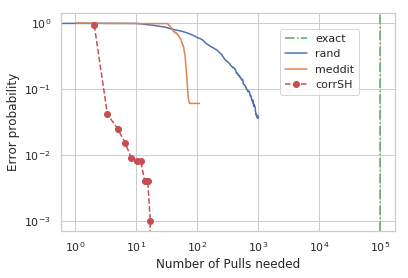

In [336]:
plt.figure() #figsize=(10,10)
plt.axvline(x=100000, color='g', linestyle = '-.', label='exact') #109140
plt.plot(randPulls, randError, label = 'rand')
plt.plot(medditPulls, medditError, label = 'meddit')
plt.plot(corrSH_num_pulls, np.array(corrSH_accuracy), '--ro', label = 'corrSH')
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Error probability")
plt.xlabel("Number of Pulls needed")
plt.legend(bbox_to_anchor = (.64,.95))
# plt.legend(bbox_to_anchor = (.64,.85))
plt.savefig("plots/NIPS_may22/netflix100k.pdf")

In [1]:
with open('../experiments/NIPS2019sim/rnaseq20k/brute/dists_default.pkl','rb') as f:
    dRNA=pickle.load(f, encoding = 'latin1')

In [905]:

d = dRNA
medoid=np.argmin(d.mean(axis=1))
print(medoid)
n=d.shape[0]
Deltas = d.mean(axis=1) - d.mean(axis=1)[medoid]

numSamples= 2000000
randInd = np.random.randint(0,n, (numSamples,4))

17094


In [908]:
randStd = np.std(d)
print(randStd)

1.7294254790309969


In [909]:
trueStds = []
rhos = []
for i in range(n):
    if i%1000==0:
        print(i)
    trueDists = d[medoid] - d[i]
    
    
    trueStd = np.std(trueDists)
    
    
    trueStds.append(trueStd)
    rhos.append(trueStd/randStd)
    
trueStds = np.array(trueStds)
rhos = np.array(rhos)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [80]:
with open('../experiments/NIPS2019sim/netflix20k/brute/compTime.pkl','rb') as f:
    print(pickle.load(f, encoding = 'latin1'))

['For dataset netflix20k brute force took 139.335639 sec']


In [ ]:
with open('../experiments/NIPS2019sim/mnist/brute/dists_default.pkl','rb') as f:
    dMNIST=pickle.load(f, encoding = 'latin1')

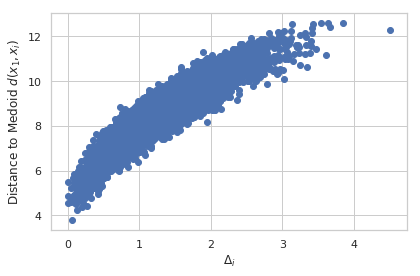

In [212]:
d = dMNIST
vals = np.mean(d, axis = 1)
medoid = np.argmin(vals)
Deltas = vals - vals[medoid]
plt.figure()
plt.scatter(np.delete(Deltas,medoid), np.delete(d[medoid],medoid))
plt.xlabel(r'$\Delta_i$')
plt.ylabel(r'Distance to Medoid $d(x_1,x_i)$')
plt.tight_layout()
plt.savefig('plots/NIPS_may22/mnist_deltaVsDistToMedoid.pdf')

In [254]:
### rho vs. delta generation

d = dRNA20k
n = d.shape[0]
# idxs = np.random.choice(d.shape[0],size=1000,replace = False)
# d = d[idxs][:,idxs]

medoid=np.argmin(d.mean(axis=1))
medoididx = medoid

# minPossible = np.min([ranking[i] for i in idxs])
# print("achieved {} when {} was best possible".format(ranking[medoididx], minPossible))

deltaEst = d.mean(axis=1) - d[medoid].mean()
rhoEst = np.std(d - d[medoid],axis=1)/np.std(d)

deltaPlot = np.delete(deltaEst,medoid)
rhoPlot = np.delete(rhoEst,medoid)

Text(0, 0.5, '1/$\\rho_i$')

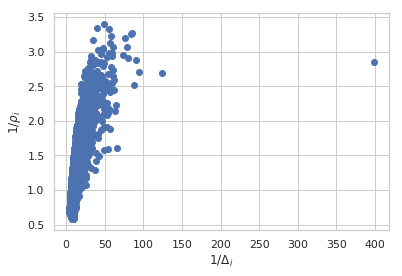

In [252]:
plt.figure()
plt.scatter(1.0/deltaPlot,1.0/rhoPlot)
plt.xlabel(r'1/$\Delta_i$')
plt.ylabel(r'1/$\rho_i$')
# plt.savefig('plots/NIPS_may22/rhoDelta_MNIST.pdf')

In [2]:
arr = (rhoEst/deltaEst)**2
arr = np.sort(np.delete(arr,medoid))[::-1]* np.arange(1,n)
tilde = max(arr)
arr = (1/deltaEst)**2
arr = np.sort(np.delete(arr,medoid))[::-1]* np.arange(1,n)
reg = max(arr)
print(tilde, reg, reg/tilde)